## Filtering the data:

The dataset I will be using: [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

Data Description: [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Your turn...

Dataset: [link](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows)

In [3]:
# read the dataset

file_path = '/content/drive/MyDrive/School Drive/Dataset/imdb_top_1000.csv'

df = pd.read_csv(file_path)

In [ ]:
# see the first few records
df[:4]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


In [ ]:
# How many movies are there?
num_rows = df.shape[0]

num_rows

1000

In [ ]:
# How many columns do we have?
num_col = df.shape[1]

num_col

16

In [ ]:
# are there any duplicates?
num_duplicates = df.duplicated().sum()

num_duplicates

0

In [ ]:
# are there any duplicates in the Released_Year column?
column_name = 'Released_Year'

num_duplicates = df.duplicated(subset=[column_name]).sum()

num_duplicates

900

In [ ]:
# take a look at the datatypes
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [ ]:
# Convert 'Released_Year' to int
for value in df['Released_Year']:
    if value.isalpha():
      df['Released_Year'].replace(value, np.NaN)

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce', downcast='integer')

# Convert 'Gross' to float
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce', downcast='float')

# Now, you can check the data types of your DataFrame
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year    float64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float32
dtype: object

In [ ]:
# take a look at the record for Fight Club
df.loc[df['Series_Title'] == 'Fight Club']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999.0,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,NaN


In [ ]:
# which are the movies released after the year 2000?
df_released = df.loc[df['Released_Year'] > 2000]

In [ ]:
# which are the 2 most famouse ones? (look at the number of votes!)
df.sort_values(by='No_of_Votes', ascending=False).head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,NaN
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,NaN


In [ ]:
# look at the oldest movie in this dataset. How to see the latest?
df.sort_values(by='No_of_Votes', ascending=True).head(6)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
264,https://m.media-amazon.com/images/M/MV5BYmFhZm...,Ba wang bie ji,1993.0,R,171 min,"Drama, Music, Romance",8.1,Two boys meet at an opera training school in P...,NaN,Kaige Chen,Leslie Cheung,Fengyi Zhang,Gong Li,You Ge,25088,NaN
721,https://m.media-amazon.com/images/M/MV5BNjRhYz...,God's Own Country,2017.0,NaN,104 min,"Drama, Romance",7.7,Spring. Yorkshire. Young farmer Johnny Saxby n...,85.0,Francis Lee,Josh O'Connor,Alec Secareanu,Gemma Jones,Ian Hart,25198,NaN
694,https://m.media-amazon.com/images/M/MV5BYjhhMD...,La planète sauvage,1973.0,U,72 min,"Animation, Sci-Fi",7.8,"On a faraway planet where blue giants rule, op...",73.0,René Laloux,Barry Bostwick,Jennifer Drake,Eric Baugin,Jean Topart,25229,NaN
718,https://m.media-amazon.com/images/M/MV5BYmMxZT...,Scarface: The Shame of the Nation,1932.0,PG,93 min,"Action, Crime, Drama",7.8,An ambitious and nearly insane violent gangste...,87.0,Howard Hawks,Richard Rosson,Paul Muni,Ann Dvorak,Karen Morley,25312,NaN
570,https://m.media-amazon.com/images/M/MV5BZmVhN2...,Raazi,2018.0,UA,138 min,"Action, Drama, Thriller",7.8,A Kashmiri woman agrees to marry a Pakistani a...,NaN,Meghna Gulzar,Alia Bhatt,Vicky Kaushal,Rajit Kapoor,Shishir Sharma,25344,NaN
785,https://m.media-amazon.com/images/M/MV5BMTI2Nz...,The Magdalene Sisters,2002.0,R,114 min,Drama,7.7,Three young Irish women struggle to maintain t...,83.0,Peter Mullan,Eileen Walsh,Dorothy Duffy,Nora-Jane Noone,Anne-Marie Duff,25938,NaN


In [ ]:
# group the movies based on the first actor and sort by the number of movies they have played in
df['Star1'].value_counts().sort_values(ascending=True)

Alicia Vikander         1
Margarita Terekhova     1
Faye Dunaway            1
Graham Chapman          1
Bertil Guve             1
                       ..
Humphrey Bogart         9
Clint Eastwood         10
Al Pacino              10
Robert De Niro         11
Tom Hanks              12
Name: Star1, Length: 660, dtype: int64

In [ ]:
# What are the Certificate types?
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [ ]:
# Which movie descriptions have NASA in their Overview?
df[df['Overview'].str.contains('NASA', case=False, na=False)]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
575,https://m.media-amazon.com/images/M/MV5BMzg2Mz...,Hidden Figures,2016.0,UA,127 min,"Biography, Drama, History",7.8,The story of a team of female African-American...,74.0,Theodore Melfi,Taraji P. Henson,Octavia Spencer,Janelle Monáe,Kevin Costner,200876,NaN
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,NaN,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,NaN


In [ ]:
# create a function that changes "The Dark Knight" movie name to "Batman"
# in the Series_Title

def change_spelling(name):
    """
    changing name of The Dark Knight to Batman
    """
# apply the changes on Series_Title
    df.loc[df[df['Series_Title'] == 'The Dark Knight'].index, 'Series_Title'] = 'Batman'

In [ ]:
# print the 'Series_Title' in df_movies to see the value has changed
df['Series_Title']

0      The Shawshank Redemption
1                 The Godfather
2               The Dark Knight
3        The Godfather: Part II
4                  12 Angry Men
                 ...           
995      Breakfast at Tiffany's
996                       Giant
997       From Here to Eternity
998                    Lifeboat
999                The 39 Steps
Name: Series_Title, Length: 1000, dtype: object

### Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Your Turn

In [ ]:
# create a column called decade that has the decade in which the house was built
file_path = '/content/drive/MyDrive/School Drive/Dataset/test.csv'
df2 = pd.read_csv(file_path)

df['Decade'] = df2['YearBuilt']
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Decade
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,NaN,1961
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,NaN,1958
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,NaN,1997
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,NaN,1998
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,NaN,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961.0,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,1950
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956.0,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,1939
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953.0,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,NaN,1939
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944.0,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,1939


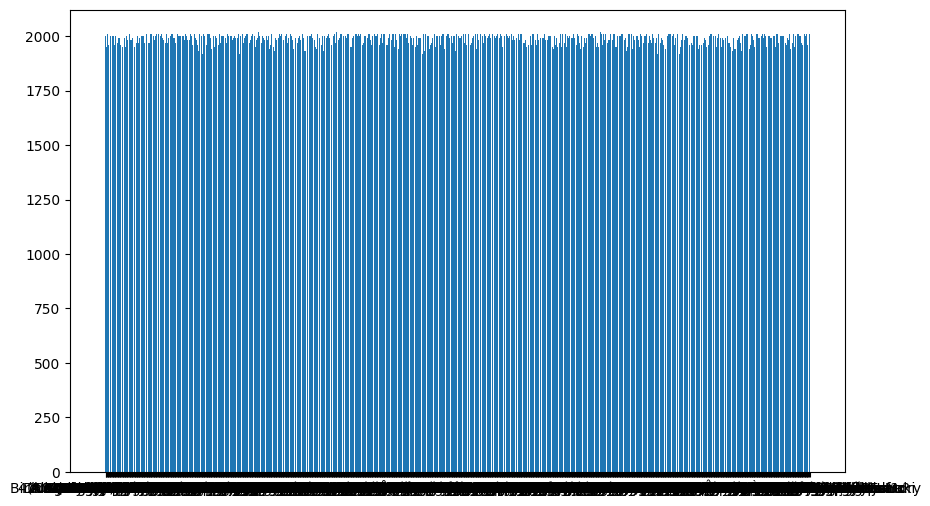

In [ ]:
# Using groupby(), plot the number of movies
# that have been made each decade in the history of cinema.
def round_down_to_10s(value):
    if math.isnan(value):
      return value

    return int(math.floor(value / 10.0) * 10)

df['Released_Year'] = df['Released_Year'].apply(round_down_to_10s)
group_df = df.groupby(['Series_Title', 'Released_Year']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
plt.bar(group_df['Series_Title'], group_df['Released_Year'])
plt.show()

<ipython-input-76-a95a8275df71>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_movies.corr()


<Axes: >

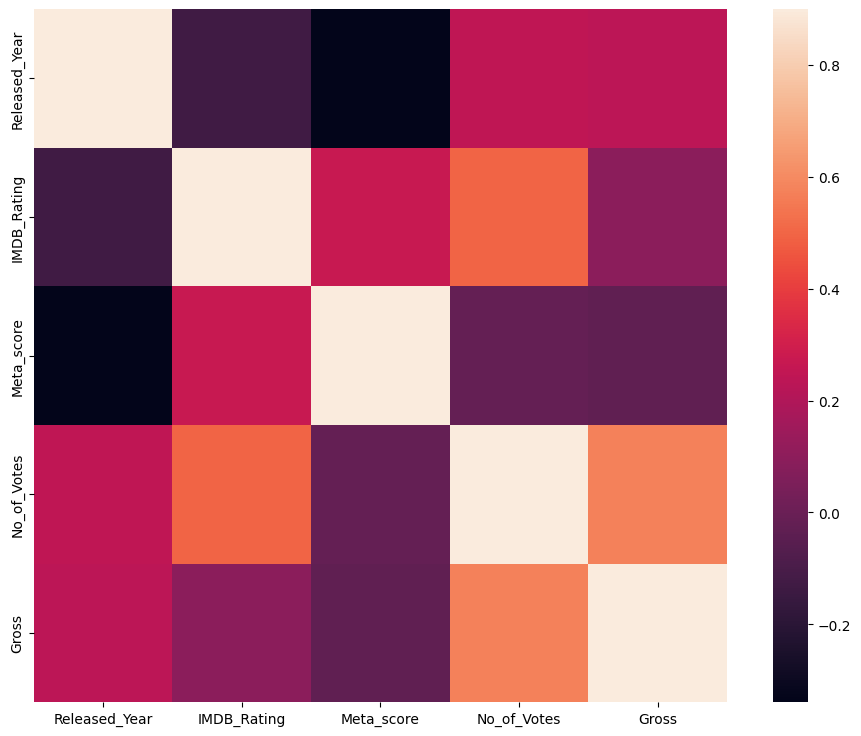

In [ ]:
# build the correlation matrix and plot it with seaborn!
# Correlation map to see how features are correlated with SalePrice


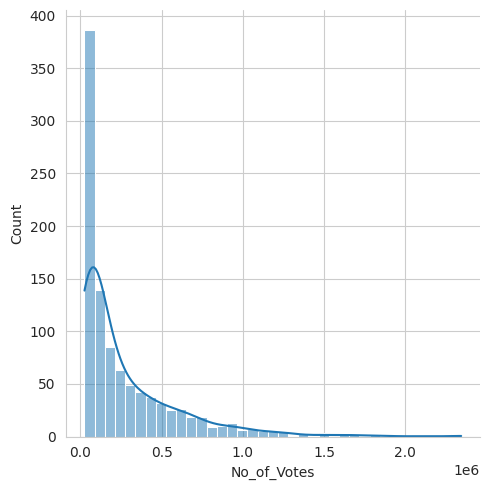

In [ ]:
# histogram


 ## Missing Values
 When handling these null values we have to divide them into three categories. [Reference](https://cjasn.asnjournals.org/content/9/7/1328.abstract)


![pic](https://github.com/mitramir55/teaching_material/blob/master/missing%20values.png?raw=true)


**Missing Completely at Random (MCAR):** This means that there is no relationship between the missing values themselves and any other feature or observation in the dataset. These are just missing randomly and without any pattern. Like when a questionnaire is lost or some parts of a survey paper are soaked and you cannot read what it's saying. Therefore we can simply ignore them.

**Missing at Random (MAR):** Means there is a pattern and relationship between the missing values and the observed values, like when the survey is about mental and physical health, male participants are less likely to know their waist circumference or boob size. We can again ignore these missing values and drop the feature or examples from our dataset. In this case we say that missing values are only related to the observed features (gender).

**Missing Not at Random (MNAR):** This is a missing value that cannot and should not be ignored. We have to model and see when were the values missing and what was the reason for it. For instance, men might not answer questions about depression because of their depression. In this case we say that the missing values are related to themselves (depression) as well as to the observed features (gender).

### Your Turn

In [24]:
# see which columns have null?
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [34]:
# drop the record that doesn't have Released_Year
df.dropna(subset=['Released_Year'], inplace=True)

In [35]:
# inspect Meta_score .describe()
df['Meta_score'].describe()

count    1000.00000
mean       77.97153
std        11.36206
min        28.00000
25%        72.00000
50%        77.97153
75%        85.25000
max       100.00000
Name: Meta_score, dtype: float64

In [36]:
# fill it with the mean value
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)

In [37]:
# see if we have any null values
df['Meta_score'].isnull().sum()

0

### Reference

* Brandon Rhodes - Pandas From The Ground Up - PyCon 2015: [link](https://www.youtube.com/watch?v=5JnMutdy6Fw&list=PL2vN4d3B5vi5gCdw4I-RAJonYAhH7k8bp&ab_channel=PyCon2015)
* Missing values – Mitra’s Kaggle Tutorial: [link](https://www.kaggle.com/code/mitramir5/missing-values-ordinal-data-and-stories)
* Crash Course Statistics: [link](https://www.youtube.com/watch?v=zouPoc49xbk&list=PL8dPuuaLjXtNM_Y-bUAhblSAdWRnmBUcr&ab_channel=CrashCourse)
